# Lectura de datos

In [1]:
b = open('../../../data/cien.txt','r', encoding="utf8")
text = b.read()

## Preprocesamiento para organizar texto

In [2]:
import re

In [3]:
text = text.split('www.lectulandia.com - Página 12\n')[1].split('www.lectulandia.com - Página 289')[0]

In [4]:
text = re.sub('(\s?www.lectulandia.com - Página \d*)','',text)
text = re.sub('\n',' ',text)

In [5]:
text = re.split('\x0c[A-Z]\s',text)
texto = [re.sub("\s\s+" , " ", capi) for capi in text]

## Datos para trabajar

In [6]:
capitulos = texto[1:]
text = ''.join(capitulos)

In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from collections import Counter

In [8]:
palabrasparar = ['entonces',
                'tan',
                'sino',
                'mientras',
                'dijo',
                'mismo',
                'después',
                'dos',
                'dio']

In [9]:
stop_words1 = stopwords.words('spanish')
stop_words1.extend(palabrasparar)
stop_words = set(stop_words1)
tokenizer=RegexpTokenizer("['\w]+")

# Funciones

### Texto

In [10]:
def palabras_texto(input_text):
    text = "".join([word for word in input_text if word not in string.punctuation])
    tokens = tokenizer.tokenize(text)
    words = [word for word in tokens if word.lower() not in stop_words]
    vocabulary = set(words)
    #print('The vocabulary size is: ',len(vocabulary))
    #print('The number of words that have been removed is {} which is {:.2f}% of total words'.format(len(tokens)-len(words),len(words)/len(tokens)*100))
    unigrams = list(ngrams(words, 1))
    freq = Counter(unigrams)
    topN= freq.most_common(400)
    wordscount = {w[0]:f for w, f in topN} 
    return wordscount

### Nube de palabras

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [12]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(66, 70, 48)" 

In [13]:
def hacer_nube(words_list):
    glasses_mask = np.array(Image.open("../../../data/mariposa1.PNG"))
    wordcloud = WordCloud(font_path = '../../../styles/Florsn01.ttf', background_color="rgba(66, 70, 48, 0)", mode="RGBA",mask=glasses_mask, width=1000, height=1500,)
    wordcloud.fit_words(wordscount)
    wordcloud.recolor(color_func=white_color_func, random_state=3)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.savefig('100_mariposa.png',bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()

### Gráfico de violin

In [34]:
def hacer_violin(names, apariciones):
    fig, axs = plt.subplots(len(names), sharex=True)
    for i, n in enumerate(names):
        sns.violinplot(x=n, data=apariciones, bw=0.05, ax=axs[i])

    for ax in axs:
        #ax.set_xlim([0, 6])
        lab = ax.get_xlabel()
        ax.set_xlabel("", fontsize=20)
        ax.set_ylabel(lab, fontsize=20, rotation=0, horizontalalignment='right', verticalalignment="center")
        #ax.grid(False)
        ax.yaxis.grid(True)
        ax.set(frame_on=False)  # New

        # Hide major tick labels
        ax.xaxis.set_major_formatter(ticker.NullFormatter())

        # Customize minor tick labels
        #ax.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5]))
        #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI" ]))



    plt.savefig(f'apariciones.png',bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()


# Inicio

## Texto entero

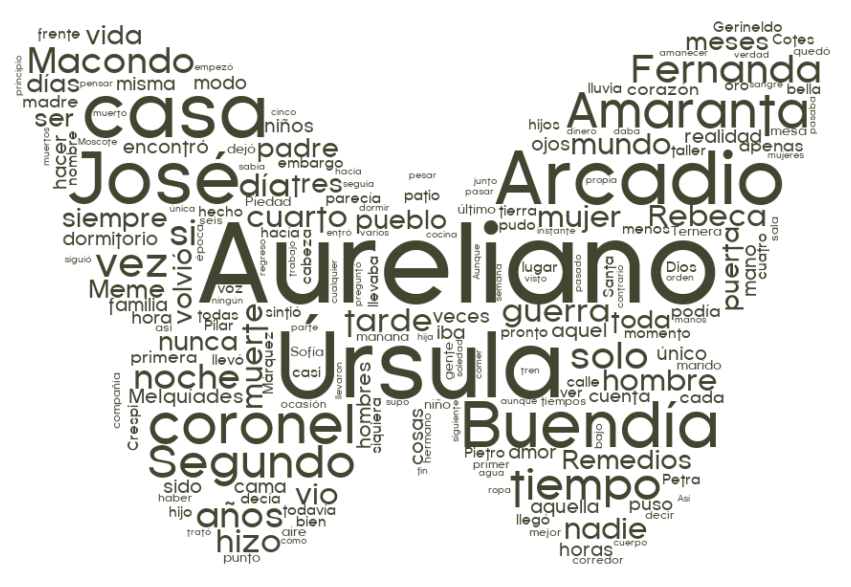

In [16]:
wordscount = palabras_texto(text)
hacer_nube(wordscount)

## Por capitulos

In [17]:
import pandas as pd

In [18]:
conteo_capitulos = []
for cap in capitulos:
    wordscount = palabras_texto(cap)
    conteo_capitulos.append(wordscount)

In [19]:
conteo_capitulos

[{'Buendía': 40,
  'José': 39,
  'Arcadio': 39,
  'Úrsula': 25,
  'Melquíades': 23,
  'aldea': 15,
  'niños': 15,
  'tiempo': 14,
  'años': 13,
  'Macondo': 13,
  'gitanos': 13,
  'casa': 13,
  'vez': 12,
  'aquella': 11,
  'mundo': 11,
  'cosas': 9,
  'gitano': 9,
  'vida': 9,
  'siempre': 9,
  'hombres': 9,
  'Aureliano': 8,
  'padre': 8,
  'oro': 8,
  'tierra': 8,
  'hombre': 8,
  'aquel': 8,
  'mujer': 8,
  'varios': 8,
  'todas': 8,
  'mano': 8,
  'toda': 8,
  'solo': 8,
  'punto': 7,
  'dejó': 7,
  'volvió': 7,
  'mar': 7,
  'tarde': 6,
  'grande': 6,
  'hizo': 6,
  'imaginación': 6,
  'lugar': 6,
  'cuartito': 6,
  'hacia': 6,
  'laboratorio': 6,
  'parecía': 6,
  'ser': 6,
  'momento': 6,
  'conocer': 5,
  'río': 5,
  'pronto': 5,
  'meses': 5,
  'región': 5,
  'fondo': 5,
  'partes': 5,
  'lupa': 5,
  'reales': 5,
  'parte': 5,
  'sierra': 5,
  'ruta': 5,
  'nadie': 5,
  'días': 5,
  'cabeza': 5,
  'llevó': 4,
  'marzo': 4,
  'carpa': 4,
  'lingotes': 4,
  'aun': 4,
  'hacía':

## Gráfico de violin

In [20]:
nombres_personajes = ['Aureliano', 'Buendía', 'José', 'Arcadio', 'Úrsula', 'Melquíades', 'Macondo']

In [21]:
list_aux = []
for cap in conteo_capitulos:
    dict_nom = {}
    for nom in nombres_personajes:
        if not nom in cap:
            cap[nom] = 0
        dict_nom[nom] = cap[nom]
    list_aux.append(dict_nom)

df_apariciones = pd.DataFrame(list_aux)

In [22]:
df_apariciones

,Aureliano,Buendía,José,Arcadio,Úrsula,Melquíades,Macondo
0,8,40,39,39,25,23,13
1,11,31,53,53,36,2,3
2,24,43,44,50,26,9,15
3,40,26,24,35,24,15,6
4,41,16,28,33,20,0,3
5,13,13,17,72,26,4,6
6,46,41,25,23,39,0,12
7,66,34,35,7,34,0,11
8,51,47,5,5,24,0,10
9,51,13,31,29,35,8,12


In [28]:
import seaborn as sns
import matplotlib.ticker as ticker

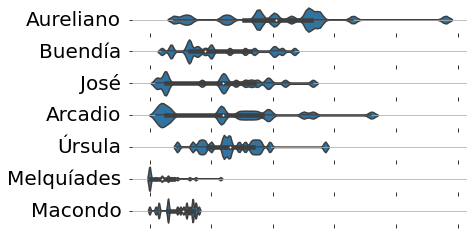

In [35]:
hacer_violin(nombres_personajes, df_apariciones)